In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import utils

In [10]:
df1 = pd.read_csv("Real_model2_exposure.csv")
df2 = pd.read_csv("Fake_model2_exposure.csv")
print(df1.head(),"\n",df2.head())
df1.shape

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.000225  0.002789  0.007053  0.013165  0.023256  0.032200   
1           1  0.287129  0.258197  0.152778  0.134534  0.107899  0.102985   
2           2  0.084317  0.000000  0.000000  0.093750  0.157895  0.186916   
3           3  0.084317  0.000000  0.090909  0.000000  0.069767  0.102041   
4           4  0.084317  0.064034  0.142857  0.000000  0.023256  0.042373   

          6         7         8  ...        246        247        248  \
0  0.067667  0.160588  0.298530  ...  43.397727  44.365662  45.341429   
1  0.120957  0.140873  0.186694  ...  40.500000  42.600000  47.000000   
2  0.142105  0.203704  0.225225  ...  43.190615  44.114840  44.927385   
3  0.123288  0.171521  0.235421  ...  43.190615  44.114840  44.927385   
4  0.111765  0.174658  0.208955  ...  43.111111  43.642857  44.000000   

         249        250        251        252        253        254        255  
0  46.443503  47.

(100, 257)

In [11]:
df1.drop(df1.columns[0], axis=1, inplace=True)
df2.drop(df2.columns[0], axis=1, inplace=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000225,0.002789,0.007053,0.013165,0.023256,0.032200,0.067667,0.160588,0.298530,0.477863,...,43.397727,44.365662,45.341429,46.443503,47.622999,48.997033,50.329582,52.011542,54.036745,56.117466
1,0.287129,0.258197,0.152778,0.134534,0.107899,0.102985,0.120957,0.140873,0.186694,0.238004,...,40.500000,42.600000,47.000000,48.500000,47.500000,48.750000,50.000000,52.500000,45.750000,50.681818
2,0.084317,0.000000,0.000000,0.093750,0.157895,0.186916,0.142105,0.203704,0.225225,0.326633,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
3,0.084317,0.000000,0.090909,0.000000,0.069767,0.102041,0.123288,0.171521,0.235421,0.266559,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
4,0.084317,0.064034,0.142857,0.000000,0.023256,0.042373,0.111765,0.174658,0.208955,0.271624,...,43.111111,43.642857,44.000000,45.400000,48.000000,48.500000,50.250654,51.399380,52.774901,54.710259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.084317,0.064034,0.057962,0.051730,0.065089,0.800000,0.285714,0.153846,0.107143,0.149083,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
96,0.084317,0.000000,0.057962,0.000000,0.000000,0.000000,0.066667,0.136986,0.139535,0.138629,...,42.000000,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
97,0.084317,0.000000,0.000000,0.000000,0.004739,0.016746,0.055351,0.069264,0.136646,0.197619,...,43.068182,43.823529,45.116279,46.409091,47.589552,48.770370,50.066390,51.568807,53.114286,55.166667
98,0.084317,0.064034,0.057962,0.000000,0.000000,0.048077,0.028986,0.051095,0.095000,0.125348,...,43.190615,44.114840,45.000000,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259


In [12]:
realX = np.array(df1)
fakeX = np.array(df2)
print(realX.shape, fakeX.shape)

np.random.shuffle(realX)
np.random.shuffle(fakeX)

(100, 256) (76, 256)


In [7]:
# real_size = int(0.80 * len(realX))
# fake_size = int(0.80 * len(fakeX))
# print(realX.shape, fakeX.shape)

# X_train = np.concatenate((realX[:real_size], fakeX[:fake_size]), axis=0)
# X_test = np.concatenate((realX[real_size:], fakeX[fake_size:]), axis=0)

# Y_train = np.array([1]*real_size + [0]*fake_size)
# Y_test = np.array([1]*(len(realX)-real_size) + [0]*(len(fakeX)-fake_size))

# print(X_train.shape, Y_train.shape, "\n", X_test.shape, Y_test.shape, "\n", Y_train, "\n", Y_test)

(28, 256) (94, 256)
(97, 256) (97,) 
 (25, 256) (25,) 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# print(X_train.shape, X_test.shape)

(97, 1, 256) (25, 1, 256)


In [10]:
#print(X_train[0][0])
# X_train = utils.normalize(X_train, axis=2)
# X_test = utils.normalize(X_test, axis=2)
#print(X_train[0][0])

In [13]:
X = np.concatenate((realX,fakeX), axis=0)
Y = np.array([1]*len(realX) + [0]*len(fakeX))

X = X.reshape(X.shape[0], 1, X.shape[1])
X = utils.normalize(X, axis=2)
print(X.shape, Y.shape)

(176, 1, 256) (176,)


In [14]:
model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X, Y, validation_split=0.2, epochs=2500)

Epoch 1/2500
5/5 [==============================] - 0s 86ms/step - loss: 0.6934 - accuracy: 0.4571 - val_loss: 0.6977 - val_accuracy: 0.0833
Epoch 2/2500
5/5 [==============================] - 0s 8ms/step - loss: 0.6892 - accuracy: 0.7500 - val_loss: 0.6963 - val_accuracy: 0.1944
Epoch 3/2500
5/5 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.7357 - val_loss: 0.7055 - val_accuracy: 0.0556
Epoch 4/2500
5/5 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.7214 - val_loss: 0.7057 - val_accuracy: 0.0556
Epoch 5/2500
5/5 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.7214 - val_loss: 0.7142 - val_accuracy: 0.0000e+00
Epoch 6/2500
5/5 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.7214 - val_loss: 0.7213 - val_accuracy: 0.0000e+00
Epoch 7/2500
5/5 [==============================] - 0s 8ms/step - loss: 0.6781 - accuracy: 0.7214 - val_loss: 0.7206 - val_accuracy: 0.0000e+00
Epoch 8

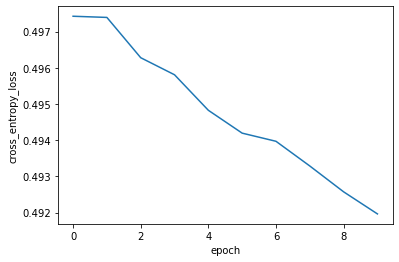

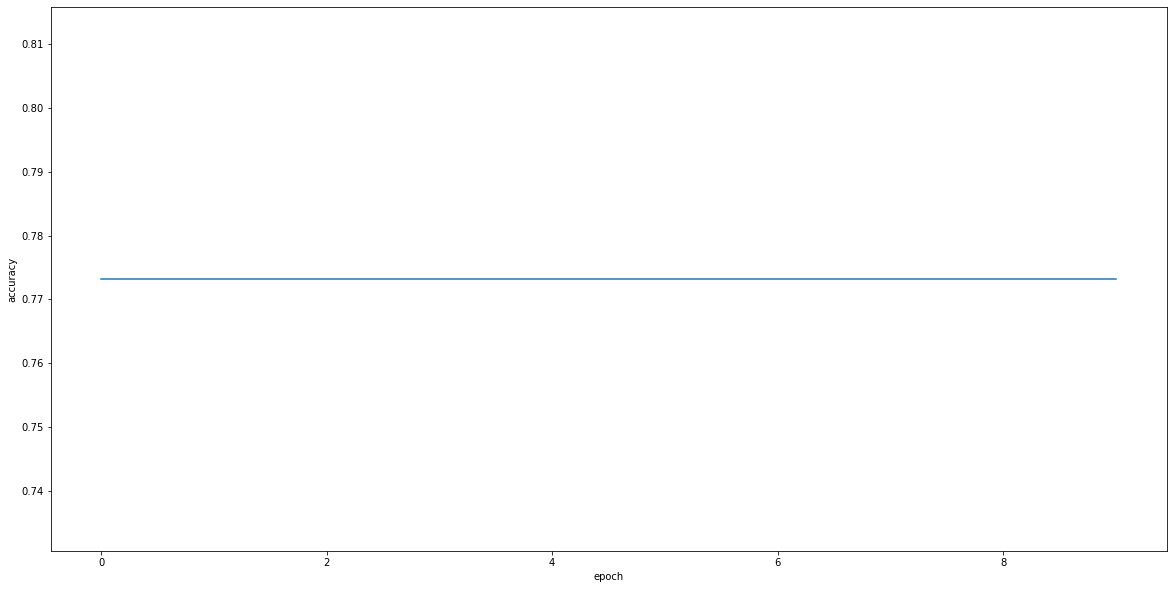

In [37]:
# plt.plot(history.history["loss"])
# plt.xlabel("epoch")
# plt.ylabel("cross_entropy_loss")
# plt.show()

# fig = plt.figure(figsize=(20,10))
# plt.plot(history.history["accuracy"])
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.show()


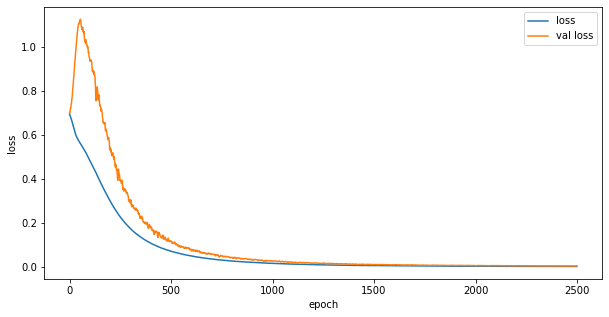

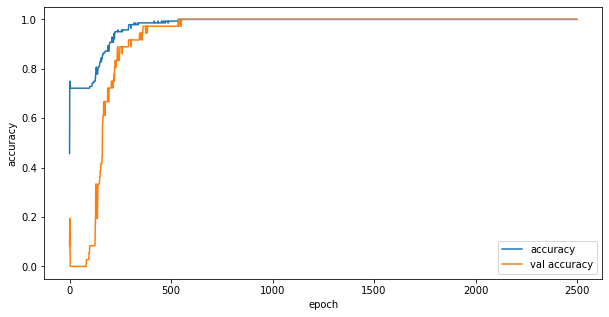

In [16]:
figure = plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

figure = plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label='accuracy')
plt.plot(history.history["val_accuracy"], label='val accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [38]:
# val_loss, val_accuracy = model.evaluate(X_test, Y_test)
# print(val_loss, val_accuracy)

1/1 [==============================] - 0s 8ms/step - loss: 0.5150 - accuracy: 0.7600
0.5149695873260498 0.7599999904632568


In [11]:
df3 = pd.read_csv("TestReal_model2_exposure.csv")
df4 = pd.read_csv("TestFake_model2_exposure.csv")

df3.drop(df3.columns[0], axis=1, inplace=True)
df4.drop(df4.columns[0], axis=1, inplace=True)

# df3 = df3.fillna(0)
# df4 = df4.fillna(0)
# print(df3,"\n",df4)

for col in df3.columns:
    df3[col] = df3[col].replace(np.NaN, df1[col].mean())
    df4[col] = df4[col].replace(np.NaN, df2[col].mean())


realX_test = np.array(df3)
fakeX_test = np.array(df4)
print(realX_test.shape, fakeX_test.shape)

# np.random.shuffle(realX_test)
# np.random.shuffle(fakeX_test)


(7, 256) (14, 256)


In [12]:
X_test = np.concatenate((realX_test,fakeX_test), axis=0)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_test = utils.normalize(X_test, axis=2)
print(X_test.shape)

(21, 1, 256)


In [13]:
Y_test = model.predict(X_test)
print(Y_test)

[[[4.1776896e-04]]

 [[1.0000000e+00]]

 [[1.0000000e+00]]

 [[1.0000000e+00]]

 [[7.3570852e-09]]

 [[1.0000000e+00]]

 [[1.0000000e+00]]

 [[4.8551765e-06]]

 [[2.9116198e-09]]

 [[4.5052171e-03]]

 [[3.8515985e-02]]

 [[8.4674093e-06]]

 [[3.1757355e-04]]

 [[1.2092823e-06]]

 [[1.7864501e-08]]

 [[1.0000000e+00]]

 [[8.0255149e-16]]

 [[3.7155961e-13]]

 [[6.0738996e-15]]

 [[2.1860825e-17]]

 [[1.7307476e-15]]]


In [14]:
model.save("single_hidden_layer.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: single_hidden_layer.model\assets
